Importing libraries.

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np

import matplotlib.pyplot as plt
import os
from google.colab import files


Extracting dataset.

In [6]:
import urllib.request
import zipfile

url = "https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip"
zip_path = 'dataset.zip'

# Download the zip file
urllib.request.urlretrieve(url, zip_path)

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')

Separing training and model sets.

In [7]:

IMG_SIZE = 224
BATCH_SIZE = 32
DATASET_DIR = "data/PetImages"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


Improve performance, make Tensorflow decide best number of prefetch and ignore errors if there is corrupted files.

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

train_ds = train_ds.apply(lambda ds: ds.ignore_errors())
val_ds = val_ds.apply(lambda ds: ds.ignore_errors())

Use  model


In [9]:
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Configuring last layer

In [10]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # One output neuron
])

Compile and train

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',           # Binary loss
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
    619/Unknown 876s 1s/step - accuracy: 0.6126 - loss: 0.6790

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


619/619 ━━━━━━━━━━━━━━━━━━━━ 1088s 2s/step - accuracy: 0.6127 - loss: 0.6789 - val_accuracy: 0.7378 - val_loss: 0.5419
Epoch 2/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1097s 2s/step - accuracy: 0.7064 - loss: 0.5680 - val_accuracy: 0.7469 - val_loss: 0.5210
Epoch 3/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1118s 2s/step - accuracy: 0.7264 - loss: 0.5450 - val_accuracy: 0.7041 - val_loss: 0.5675
Epoch 4/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1144s 2s/step - accuracy: 0.7199 - loss: 0.5526 - val_accuracy: 0.7423 - val_loss: 0.5166
Epoch 5/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1105s 2s/step - accuracy: 0.7303 - loss: 0.5416 - val_accuracy: 0.7555 - val_loss: 0.5058
Epoch 6/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1093s 2s/step - accuracy: 0.7292 - loss: 0.5377 - val_accuracy: 0.7420 - val_loss: 0.5137
Epoch 7/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1099s 2s/step - accuracy: 0.7302 - loss: 0.5380 - val_accuracy: 0.7537 - val_loss: 0.5045
Epoch 8/10
619/619 ━━━━━━━━━━━━━━━━━━━━ 1066s 2s/step - accuracy: 0.7309 - loss: 0.5353 - val_accurac

Plot model

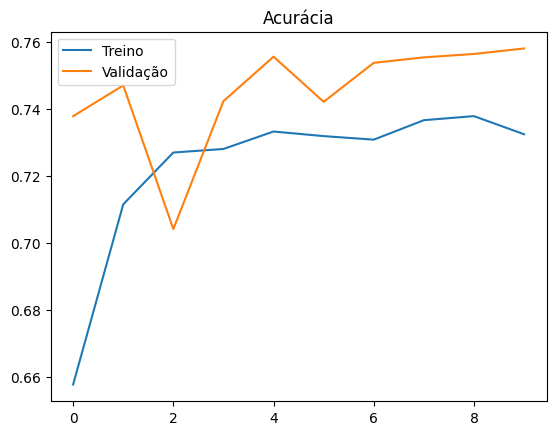

In [12]:
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.legend()
plt.title('Acurácia')
plt.show()

Code to catch image

In [28]:
uploaded = files.upload()

# Get the uploaded image path
img_path = next(iter(uploaded))

Saving cat.jpeg to cat (1).jpeg


Predicted image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


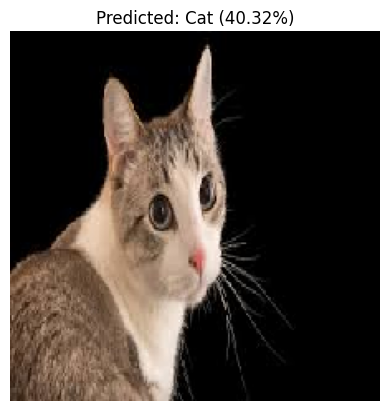

In [29]:
IMG_SIZE = 224

# Load and preprocess
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_names = ['Cat', 'Dog']

# Show result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_class]} ({predictions[0][predicted_class]*100:.2f}%)")
plt.show()

In [32]:
uploaded = files.upload()

# Get the uploaded image path
img_path = next(iter(uploaded))

Saving dog4.jpeg to dog4.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


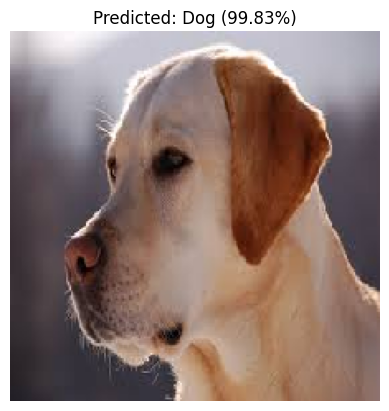

In [33]:
IMG_SIZE = 224

# Load and preprocess
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Predict
predictions = model.predict(img_array)
predicted_class = int(np.round(predictions[0][0]))  # 0 or 1
class_names = ['Cat', 'Dog']

# Show result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_class]} ({predictions[0][0]*100:.2f}%)")
plt.show()